In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import os

In [2]:
file_path = 'data/exchange_rate/exchange_rate.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,date,0,1,2,3,4,5,6,OT
0,1990/1/1 0:00,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.525486,0.5930
1,1990/1/2 0:00,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.523972,0.5940
2,1990/1/3 0:00,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.526316,0.5973
3,1990/1/4 0:00,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.523834,0.5970
4,1990/1/5 0:00,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.527426,0.5985


In [4]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7588 non-null   object 
 1   0       7588 non-null   float64
 2   1       7588 non-null   float64
 3   2       7588 non-null   float64
 4   3       7588 non-null   float64
 5   4       7588 non-null   float64
 6   5       7588 non-null   float64
 7   6       7588 non-null   float64
 8   OT      7588 non-null   float64
dtypes: float64(8), object(1)
memory usage: 533.7+ KB
None


In [5]:
# Display summary statistics
print(df.describe())

                 0            1            2            3            4  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.776974     1.634105     0.821811     0.848146     0.142833   
std       0.136620     0.161544     0.117123     0.168874     0.023996   
min       0.483297     1.211534     0.618582     0.548617     0.109292   
25%       0.701422     1.532887     0.727901     0.696864     0.120814   
50%       0.761377     1.606574     0.811582     0.813959     0.145212   
75%       0.873477     1.707646     0.920394     1.014018     0.159948   
max       1.102536     2.109000     1.091524     1.374079     0.237954   

                 5            6           OT  
count  7588.000000  7588.000000  7588.000000  
mean      0.009343     0.669673     0.654418  
std       0.001458     0.082836     0.115292  
min       0.006254     0.523834     0.393153  
25%       0.008331     0.593287     0.566000  
50%       0.009151     0.662767     0.669187  
75% 

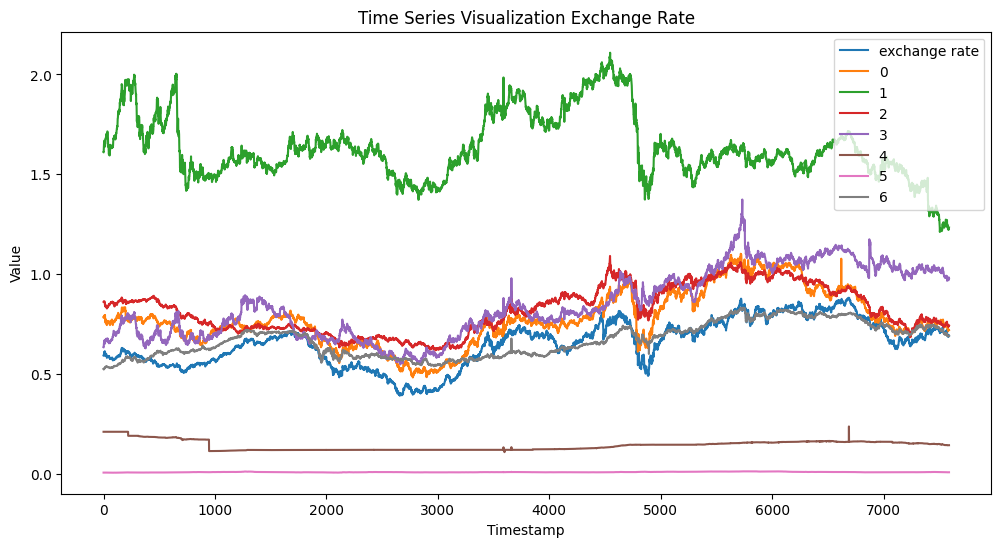

In [6]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['OT'], label='exchange rate')
plt.plot(df.index, df['0'], label='0')
plt.plot(df.index, df['1'], label='1')
plt.plot(df.index, df['2'], label='2')
plt.plot(df.index, df['3'], label='3')
plt.plot(df.index, df['4'], label='4')
plt.plot(df.index, df['5'], label='5')
plt.plot(df.index, df['6'], label='6')
plt.title('Time Series Visualization Exchange Rate')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

KeyboardInterrupt: 

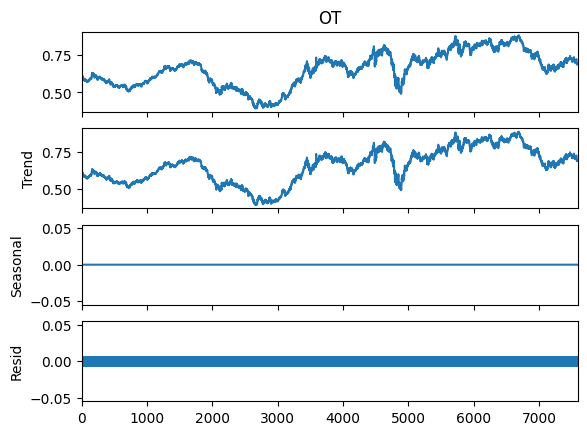

In [7]:
# Plot a time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['OT'], model='additive', period=1)  # Adjust 'period' as needed
result.plot()
plt.suptitle('Time Series Decomposition')
plt.show()


In [ ]:
# Generate a sample signal
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))  # Example signal

# Compute FFT
fft_result = np.fft.fft(signal)


In [ ]:
# Calculate power spectrum
power_spectrum = np.abs(fft_result)**2

# Compute autocorrelation using inverse FFT
autocorrelation = np.fft.ifft(power_spectrum)

# Plot the original signal, power spectrum, and autocorrelation
plt.figure(figsize=(12, 6))

plt.subplot(4, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')

plt.subplot(4, 1, 2)
plt.plot(t, fft_result)
plt.title('FFT Signal')

plt.subplot(4, 1, 3)
frequencies = np.fft.fftfreq(len(t), 1/fs)
plt.plot(frequencies, power_spectrum)
plt.title('Power Spectrum')

plt.subplot(4, 1, 4)
lags = np.arange(0, len(t))
plt.plot(lags, autocorrelation)
plt.title('Autocorrelation')

plt.tight_layout()
plt.show()

In [ ]:
from autoformer.utils.data_provider.data_factory import data_provider

In [ ]:
import torch
import numpy as np
import random

class Arguments:
    def __init__(self):
        self.fix_seed: int = 2021
        random.seed(self.fix_seed)
        torch.manual_seed(self.fix_seed)
        np.random.seed(self.fix_seed)

        # basic config
        self.is_training: int = 1
        self.model_id: str = 'test'
        self.model: str = 'Autoformer'

        # data loader
        self.data: str = 'custom'
        self.root_path: str = './dataset/exchange_rate/'
        self.data_path: str = 'exchange_rate.csv'
        self.features: str = 'M'
        self.target: str = 'OT'
        self.freq: str = 'h'
        self.checkpoints: str = './checkpoints/'

        # forecasting task
        self.seq_len: int = 96
        self.label_len: int = 48
        self.pred_len: int = 96

        # model define
        self.bucket_size: int = 4
        self.n_hashes: int = 4
        self.enc_in: int = 7
        self.dec_in: int = 7
        self.c_out: int = 7
        self.d_model: int = 512
        self.n_heads: int = 8
        self.e_layers: int = 2
        self.d_layers: int = 1
        self.d_ff: int = 2048
        self.moving_avg: int = 25
        self.factor: int = 1
        self.distil: bool = True
        self.dropout: float = 0.05
        self.embed: str = 'timeF'
        self.activation: str = 'gelu'
        self.output_attention: bool = False
        self.do_predict: bool = False

        # optimization
        self.num_workers: int = 10
        self.itr: int = 2
        self.train_epochs: int = 10
        self.batch_size: int = 32
        self.patience: int = 3
        self.learning_rate: float = 0.0001
        self.des: str = 'test'
        self.loss: str = 'mse'
        self.lradj: str = 'type1'
        self.use_amp: bool = False

        # GPU
        self.use_gpu: bool = torch.cuda.is_available()
        self.gpu: int = 0
        self.use_multi_gpu: bool = False
        self.devices: str = '0,1,2,3'
        self.device_ids: List[int] = [int(id_) for id_ in self.devices.replace(' ', '').split(',')]


In [ ]:
args_instance = Arguments()

In [ ]:

args_instance.is_training = 1
args_instance.root_path = './data/exchange_rate/'
args_instance.data_path = 'exchange_rate.csv'
args_instance.model_id = 'Exchange_96_96'
args_instance.model = 'Autoformer'
args_instance.data = 'custom'
args_instance.features = 'M'
args_instance.seq_len = 96
args_instance.label_len = 48
args_instance.pred_len = 96
args_instance.e_layers = 2
args_instance.d_layers = 1
args_instance.factor = 3
args_instance.enc_in = 8
args_instance.dec_in = 8
args_instance.c_out = 8
args_instance.des = 'Exp'
args_instance.itr = 1


In [ ]:
test_data, test_loader = data_provider(args = args_instance, flag='test')

In [ ]:
len(test_loader)

In [ ]:
for batch in test_loader:
    # The batch is a tuple or dictionary containing your data
    # For simplicity, let's assume it's a tuple
    batch_x, batch_y, batch_x_mark, batch_y_mark = batch

    # Break the loop after processing the first batch
    break

In [ ]:
batch_x[0].shape

In [ ]:
batch_y[0].shape

In [ ]:
batch_y_mark[0].shape

In [ ]:
batch_x_mark[0].shape

In [ ]:
tmp_stamp = df_raw[['date']][border1:border2]
tmp_stamp['date'] = pd.to_datetime(tmp_stamp.date)
pred_dates = pd.date_range(tmp_stamp.date.values[-1], periods=self.pred_len + 1, freq=self.freq)

df_stamp = pd.DataFrame(columns=['date'])
df_stamp.date = list(tmp_stamp.date.values) + list(pred_dates[1:])
if self.timeenc == 0:
    df_stamp['month'] = df_stamp.date.apply(lambda row: row.month, 1)
    df_stamp['day'] = df_stamp.date.apply(lambda row: row.day, 1)
    df_stamp['weekday'] = df_stamp.date.apply(lambda row: row.weekday(), 1)
    df_stamp['hour'] = df_stamp.date.apply(lambda row: row.hour, 1)
    df_stamp['minute'] = df_stamp.date.apply(lambda row: row.minute, 1)
    df_stamp['minute'] = df_stamp.minute.map(lambda x: x // 15)
    data_stamp = df_stamp.drop(['date'], 1).values
elif self.timeenc == 1:
    data_stamp = time_features(pd.to_datetime(df_stamp['date'].values), freq=self.freq)
    data_stamp = data_stamp.transpose(1, 0)

In [ ]:
tmp_stamp = df[['date']]

In [ ]:
tmp_stamp['date'] = pd.to_datetime(tmp_stamp.date)

In [ ]:
pred_dates = pd.date_range(tmp_stamp.date.values[-1], periods=96 + 1, freq='h')

In [ ]:
df_stamp = pd.DataFrame(columns=['date'])
df_stamp.date = list(tmp_stamp.date.values) + list(pred_dates[1:])

In [ ]:
df_stamp['month'] = df_stamp.date.apply(lambda row: row.month, 1)
df_stamp['day'] = df_stamp.date.apply(lambda row: row.day, 1)
df_stamp['weekday'] = df_stamp.date.apply(lambda row: row.weekday(), 1)
df_stamp['hour'] = df_stamp.date.apply(lambda row: row.hour, 1)
df_stamp['minute'] = df_stamp.date.apply(lambda row: row.minute, 1)
df_stamp['minute'] = df_stamp.minute.map(lambda x: x // 15)
#data_stamp = df_stamp.drop(['date'], 1).values

In [ ]:
df_stamp

In [ ]:
df_stamp.columns

In [ ]:
batch_x_mark

In [15]:
from models.utils.data_provider.data_factory import data_provider
from models.exp_basic import Exp_Basic
from models.utils.tools import EarlyStopping, adjust_learning_rate, visual
from models.utils.metrics import metric
import torch
import torch.nn as nn
from torch import optim
import os
import time
import warnings
import numpy as np

In [8]:
os.getcwd()

'/Users/alexandermendelsohn/Documents/Time-Series-Tranformer-PyTorch/Transformer-Time-Series-Data'